# Installing Packages

### What are packages and why are they needed?
Conda packages are files containing a bundle of resources: usually libraries and executables, but not always. In principle, Conda packages can include data, images, notebooks, or other assets. The command-line tool conda is used to install, remove and examine packages; other tools such as the GUI Anaconda Navigator also expose the same capabilities. This course focuses on the conda tool itself (you'll see use cases other than package management in later chapters).

Conda packages are most widely used with Python, but that's not all. Nothing about the Conda package format or the conda tool itself assumes any specific programming language. Conda packages can also be used for bundling libraries in other languages (like R, Scala, Julia, etc.) or simply for distributing pure binary executables generated from any programming language.

One of the powerful aspects of conda—both the tool and the package format—is that dependencies are taken care of. That is, when you install any Conda package, any other packages needed get installed automatically. Tracking and determining software dependencies is a hard problem that package managers like Conda are designed to solve.

A Conda package, then, is a file containing all files needed to make a given program execute correctly on a given system. Moreover, a Conda package can contain binary artifacts specific to a particular platform or operating system. Most packages (and their dependencies) are available for Windows (win-32 or win-64), for OSX (osx-64), and for Linux (linux-32 or linux-64). A small number of Conda packages are available for more specialized platforms (e.g., Raspberry Pi 2 or POWER8 LE). As a user, you do not need to specify the platform since Conda will simply choose the Conda package appropriate for the platform you are using.

### What version of conda do I have?
The tool conda takes a variety of commands and arguments. Most of the time, you will use conda COMMAND OPTIONS --SWITCH. You will learn the collection of COMMANDs available in the next lessons. A summary is available on the help screen:
```
$ conda --help
usage: conda [-h] [-V] command ...

conda is a tool for managing and deploying applications, environments and packages.

Options:

positional arguments:
  command
    clean        Remove unused packages and caches.
    config       Modify configuration values in .condarc. This is modeled
                 after the git config command. Writes to the user .condarc
                 file (/Users/dmertz/.condarc) by default.
    create       Create a new conda environment from a list of specified
                 packages.
    help         Displays a list of available conda commands and their help
                 strings.
    info         Display information about current conda install.
    install      Installs a list of packages into a specified conda
                 environment.
    [... more commands ...]

optional arguments:
  -h, --help     Show this help message and exit.
  -V, --version  Show the conda version number and exit.
```

### Install a conda package (I)
Just as you can get help on conda as a whole, you can get help on commands within it. You will often use the command conda install; you can look at the corresponding help documentation using the terminal window. That is, run conda install --help and read through the output.


### Install a conda package (II)
Installing a package is largely a matter of listing the name(s) of packages to install after the command conda install. But there is more to it behind the scenes. The versions of packages to install (along with all their dependencies) must be compatible with all versions of other software currently installed. Often this "satisfiability" constraint depends on choosing a package version compatible with a particular version of Python that is installed. Conda is special among "package managers" in that it always guarantees this consistency; you will see the phrase "Solving environment..." during installation to indicate this computation.

For example, you may simply instruct conda to install foo-lib. The tool first determines which operating system you are running, and then narrows the match to candidates made for this platform. Then, conda determines the version of Python on the system (say 3.7), and chooses the package version for -py37. But, beyond those simple limits, all dependencies are checked.

Suppose foo-lib is available in versions 1.0, 1.1, 1.2, 2.0, 2.1, 2.2, 2.3, 3.0, 3.1 (for your platform and Python version). As a first goal, conda attempts to choose the latest version of foo-lib. However, maybe foo-lib depends on bar-lib, which itself is available in various versions (say 1 through 20 in its versioning scheme). It might be that foo-lib 3.1 is compatible with bar-lib versions 17, 18, and 19; but blob-lib (which is already installed) is compatible only with versions of bar-lib less than 17. Therefore, conda would examine the compatibility of foo-lib 3.0 as a fallback. In this hypothetical, foo-lib 3.0 is compatible with bar-lib 16, so that version is chosen (bar-lib is also updated to the latest compatible version 16 in the same command if an earlier version is currently installed).

Visually (octagons mark chosen versions):
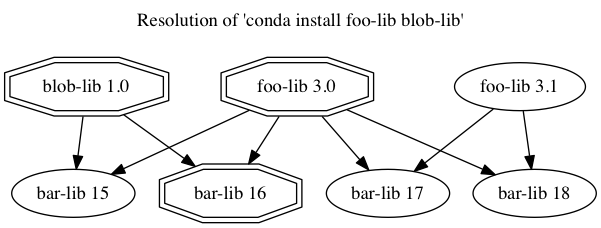

### What is semantic versioning?
Most Conda packages use a system called semantic versioning to identify distinct versions of a software package unambiguously. Version labels are usually chosen by the project authors, not necessarily the same people who bundle the project as a Conda package. There is no technical requirement that a project author's version label coincides with a Conda package version label, but the convention of doing so is almost always followed. Semantic version labels can be compared lexicographically and make it easy to determine which of two versions is the later version.

Under semantic versioning, software is labeled with a three-part version identifier of the form MAJOR.MINOR.PATCH; the label components are non-negative integers separated by periods. Assuming all software starts at version 0.0.0, the MAJOR version number is increased when significant new functionality is introduced (often with corresponding API changes). Increases in the MINOR version number generally reflect improvements (e.g., new features) that avoid backward-incompatible API changes. For instance, adding an optional argument to a function API (in a way that allows old code to run unchanged) is a change worthy of increasing the MINOR version number. An increment to the PATCH version number is appropriate mostly for bug fixes that preserve the same MAJOR and MINOR revision numbers. Software patches do not typically introduce new features or change APIs at all (except sometimes to address security issues).

Many command-line tools display their version identifier by running tool --version. This information can sometimes be displayed or documented in other ways. For example, suppose on some system, a certain version of Python is installed, and you inquire about it like this:
```
python -c "import sys; sys.version"
'1.0.1 (Mar 26 2014)'
```

### Which package version is installed?
Because conda installs packages automatically, it's hard to know which package versions are actually on your system. That is, packages you didn't install explicitly get installed for you to resolve another package's dependencies.

Fortunately, the command conda list comes to your aid to query the current state. By itself, this lists all packages currently installed.
You can use conda list --help to see how to extract specific packages from that list or how to display it in different formats.

### Install a specific version of a package (I)
Sometimes there are reasons why you need to use a specific version of a package, not necessarily simply the latest version compatible with your other installed software. You may have scripts written that depend on particular older APIs, or you may have received code written by colleagues who used specific versions and you want to guarantee replication of the same behavior. Likewise, you may be writing code that you intend to pass to other users who you know to be using specific package versions on their systems (perhaps as a company standard, for example).

conda allows you to install software versions in several flexible ways. Your most common pattern will probably be prefix notation, using semantic versioning. For example, you might want a MAJOR and MINOR version, but want conda to select the most up-to-date PATCH version within that series. You could spell that as:

`conda install foo-lib=12.3`

Or similarly, you may want a particular major version, and prefer conda to select the latest compatible MINOR version as well as PATCH level. You could spell that as:

`conda install foo-lib=13`

If you want to narrow the installation down to an exact PATCH level, you can specify that as well with:

`conda install foo-lib=14.3.2`

Keep in mind that relaxing constraints may allow for satisfying multiple dependencies among installed software. Occasionally you will try to install some software version that is simply inconsistent with other software installed, and conda will warn you about that rather than install anything.

### Install a specific version of a package (II)
Most commonly, you'll use prefix-notation to specify the package version(s) to install. But conda offers even more powerful comparison operations to narrow versions. For example, if you wish to install either bar-lib versions 1.0, 1.4 or 1.4.1b2, but definitely not version 1.1, 1.2 or 1.3, you could use:

`conda install 'bar-lib=1.0|1.4*'`

This may seem odd, but you might know, for example, that a bug was introduced in 1.1 that wasn't fixed until 1.4. You would prefer the 1.4 series, but, if it is incompatible with other packages, you can settle for 1.0. Notice we have used single quotes around the version expression in this case because several of the symbols in these more complex patterns have special meanings in terminal shells. It is easiest just to quote them.

With conda you can also use inequality comparisons to select candidate versions (still resolving dependency consistency). Maybe the bug above was fixed in 1.3.5, and you would like either the latest version available (perhaps even 1.5 or 2.0 have come out), but still avoiding versions 1.1 through 1.3.4. You could spell that as:

`conda install 'bar-lib>=1.3.4,<1.1'`

### Update a conda package
Closely related to installing a particular version of a conda package is updating the installed version to the latest version possible that remains compatible with other installed software. conda will determine if it is possible to update dependencies of the package(s) you are directly updating, and do so if resolvable. At times, the single specified package will be updated exclusively since the current dependencies are correct for the new version. Obviously, at other times updating will do nothing because you are already at the latest version possible.

The command conda update PKGNAME is used to perform updates. Update is somewhat less "aggressive" than install in the sense that installing a specific (later) version will revise the versions in the dependency tree to a greater extent than an update. Often update will simply choose a later PATCH version even though potentially a later MAJOR or MINOR version could be made compatible with other installed packages.

Note that this conda command, as well as most others allow specification of multiple packages on the same line. For example, you might use:

`conda update foo bar blob`

To bring all of foo, bar, and blob up to the latest compatible versions mutually satisfiable.

### Remove a conda package
Finally, in direct package management, sometimes you want to remove a package. This is straightforward using the command conda remove PKGNAME. As with other commands, you may also optionally specify multiple packages separated by spaces.

Note that conda always tries to use the most recent versions of installed software that are compatible. Therefore, sometimes removing one package allows another package to be upgraded implicitly because only the removed package was requiring the older version of the dependency.

### Search for available package versions?
Sometimes you want to see what versions of a package are available as conda packages. By default conda search looks for those matching your platform (although switches allow tweaking this behavior).

### Find dependencies for a package version?
The conda info command reports a variety of details about a specific package. The syntax for specifying just one version is a little bit complex, but prefix notation is allowed here (just as you would with conda install).

For example, running `conda info cytoolz=0.8.2` will report on all available package versions. As this package has been built for a variety of Python versions, a number of packages will be reported on. You can narrow your query further with, e.g.:

```
$ conda info cytoolz=0.8.2=py36_0

cytoolz 0.8.2 py36_0
<hr />-----------------
file name   : cytoolz-0.8.2-py36_0.tar.bz2
name        : cytoolz
version     : 0.8.2
build string: py36_0
build number: 0
channel     : https://repo.continuum.io/pkgs/free
size        : 352 KB
arch        : x86_64
constrains  : ()
date        : 2016-12-23
license     : BSD
md5         : cd6068b2389b1596147cc7218f0438fd
platform    : darwin
subdir      : osx-64
url         : https://repo.continuum.io/pkgs/free/osx-64/cytoolz-0.8.2-py36_0.tar.bz2
dependencies:
    python 3.6*
    toolz >=0.8.0
```
You may use the * wildcard within the match pattern. This is often useful to match 'foo=1.2.3=py36*' because recent builds have attached the hash of the build at the end of the Python version string, making the exact match unpredictable.

# Utilizing Channels

### Channels and why are they needed?
All Conda packages we've seen so far were published on the main or default channel of Anaconda Cloud. A Conda channel is an identifier of a path (e.g., as in a web address) from which Conda packages can be obtained. Using the public cloud, installing without specifying a channel points to the main channel at https://repo.continuum.io/pkgs/main; where hundreds of packages are available. Although covering a wide swath, the main channel contains only packages that are (moderately) curated by Anaconda Inc. Given finite resources and a particular area focus, not all genuinely worthwhile packages are vetted by Anaconda Inc.

If you happen to be working in a firewalled or airgapped environment with a private installation of Anaconda Repository, your default channel may point to a different (internal) URL, but the same concepts will apply.

Anyone may register for an account with Anaconda Cloud, thereby creating their own personal Conda channel. This is covered in the companion course Conda for Building & Distributing Packages (along with creating and uploading your own packages). For this course, just understand that many users have accounts and corresponding channels.

### Searching within channels
If a particular colleague or other recognized user may have published a package useful to you, you can search for it using the anaconda search command. For example, David Mertz, the principal author of this course, has a channel and Anaconda Cloud account called davidmertz. You can search his channel using the command below; the option --channel (or -c for short) specifies the channel to search. Particular users may have published more niche software you would like to use; for example, colleagues of yours may publish packages of special use in your field or topic area.
```
$ conda search --channel davidmertz --override-channels --platform linux-64
Loading channels: done
Name                       Version                   Build  Channel
accelerate                 2.2.0               np110py27_2  davidmertz
accelerate                 2.2.0               np110py35_2  davidmertz
accelerate-dldist          0.1                 np110py27_1  davidmertz
accelerate-dldist          0.1                 np110py35_1  davidmertz
accelerate-gensim          0.12.3             np110py27_96  davidmertz
accelerate-gensim          0.12.3             np110py35_96  davidmertz
accelerate-skimage         0.1.0                    py27_1  davidmertz
accelerate-skimage         0.1.0                    py35_1  davidmertz
constants                  0.0.2                    py35_0  davidmertz
humidity                   0.1              py36ha038022_0  davidmertz
textadapter                2.0.0                    py27_0  davidmertz
textadapter                2.0.0                    py35_0  davidmertz
textadapter                2.0.0                    py36_0  davidmertz
```

In this case, the switch --override-channels is used to prevent searching on default channels. The switch --platform is used to select a platform that may differ from the one on which the search is run (absent the switch, the current computer's platform is used).

The first search is unusual in that it does not specify a package name, which is more typical actual use. For example, you might want to know which versions of the package of textadapter for the win-64 platform are available for any version of Python (assuming you know in which channels to look):
```
$ conda search -c conda-forge -c sseefeld -c gbrener --platform win-64 textadapter
Loading channels: done
Name                       Version                   Build  Channel
textadapter                2.0.0                    py27_0  conda-forge
textadapter                2.0.0                    py27_0  sseefeld
textadapter                2.0.0                    py34_0  sseefeld
textadapter                2.0.0                    py35_0  conda-forge
textadapter                2.0.0                    py35_0  sseefeld
textadapter                2.0.0                    py36_0  sseefeld
```

### Searching across channels
Although the conda command and its subcommands are used for nearly everything in this course, the package anaconda-client provides the command anaconda that searches in a different manner that is often more useful. For instance, you may know the name of the textadapter package, but you may not know in which channel (or channels) it may be published (or by which users). You can search across all channels and all platforms using:

```
$ anaconda search textadapter
Using Anaconda API: https://api.anaconda.org
Packages:
     Name                      |  Version | Package Types   | Platforms       | Builds
     ------------------------- |   ------ | --------------- | --------------- | ----------
     DavidMertz/textadapter    |    2.0.0 | conda           | linux-64, osx-64 | py36_0, py35_0, py27_0
     conda-forge/textadapter   |    2.0.0 | conda           | linux-64, win-32, osx-64, win-64 | py35_0, py27_0
     gbrener/textadapter       |    2.0.0 | conda           | linux-64, osx-64 | py35_0, py27_0
                                          : python interface Amazon S3, and large data files
     sseefeld/textadapter      |    2.0.0 | conda           | win-64          | py36_0, py34_0, py35_0, py27_0
                                          : python interface Amazon S3, and large data files
Found 4 packages
```

### Default, non-default, and special channels
The default channel on Anaconda Cloud is curated by Anaconda Inc., but another channel called conda-forge also has a special status. This channel does not operate any differently than other channels, whether those others are associated with an individual or organization, but it acts as a kind of "community curation" of relatively well-vetted packages. The GitHub page for the conda-forge project at https://github.com/conda-forge describes it as: "A community led collection of recipes, build infrastructure and distributions for the conda package manager."

Apart from the somewhat more organized conda-forge channel/project, Anaconda Cloud channels are relatively anarchic. Much like GitHub repos or packages on the Python Package Index (PyPI), anyone is free to upload whatever projects they like to conda-forge (as long as they are assembled as Conda packages, that is, but this is a minor restriction).

You should generally trust or rely only on packages sourced from reputable channels. There is no inherent rating system for channels or their packages. However, you are likely to trust your colleagues, your organization, well-known people in your software or data science communities, and so on.

conda-forge is almost certainly the most widely used channel on Anaconda Cloud. In fact, it has very many more packages than the main channel itself. Use the tools from this course to make a rough estimate of the number of packages available on the conda-forge channel for the linux-64 platform (i.e., the platform used for this session).

conda-forge is almost certainly the most widely used channel on Anaconda Cloud. In fact, it has very many more packages than the main channel itself. Use the tools from this course to make a rough estimate of the number of packages available on the conda-forge channel for the linux-64 platform (i.e., the platform used for this session).

`conda search -c conda-forge --platform linix-64 --override-channels | wc -l`

### Installing from a channel
We saw in the last exercise that there are about 30,000 linux-64 packages on conda-forge. Across all the channels there are about 50,000 packages, most of those for at least 3 of of the 5 main platforms (osx-64, linux-32, linux-64, win-32, win-64; 32-bit support is of diminishing importance compared to 64-bit). There are around 2500 channels that have been active in the last 6 months; most are individual users, but a fair number belonging to projects or organizations. A majority of package names are published by more than one different channel; sometimes just as a copy, other times with a tweak or compiler optimization, or in a different version.

The whole point of having channels is to be able to install packages from them. For this exercise, you will install a version of a package not available on the default channel. Adding a channel to install from simply requires using the same --channel or -c switch we have seen in other conda commands, but with the conda install command.

For example:

`conda install --channel my-organization the-package`

# Working with Environments

### Environments and why are they needed?
Conda environments allow multiple incompatible versions of the same (software) package to coexist on your system. An environment is simply a file path containing a collection of mutually compatible packages. By isolating distinct versions of a given package (and their dependencies) in distinct environments, those versions are all available to work on particular projects or tasks.

There are a large number of reasons why it is best practice to use environments, whether as a data scientist, software developer, or domain specialist. Without the concept of environments, users essentially rely on and are restricted to whichever particular package versions are installed globally (or in their own user accounts) on a particular machine. Even when one user moves scripts between machines (or shares them with a colleague), the configuration is often inconsistent in ways that interfere with seamless functionality. Conda environments solve both these problems. You can easily maintain and switch between as many environments as you like, and each one has exactly the collection of packages that you want.

For example, you may develop a project comprising scripts, notebooks, libraries, or other resources that depend on a particular collection of package versions. You later want to be able to switch flexibly to newer versions of those packages and to ensure the project continues to function properly before switching wholly. Or likewise, you may want to share code with colleagues who are required to use certain package versions. In this context, an environment is a way of documenting a known set of packages that correctly support your project.



### Which environment am I using?
When using conda, you are always in some environment, but it may be the default (called the base or root environment). Your current environment has a name and contains a collection of packages currently associated with that environment. There are a few ways to determine the current environment.

Most obviously, at a terminal prompt, the name of the current environment is usually prepended to the rest of your prompt in parentheses. Alternatively, the subcommand conda env list displays a list of all environments on your current system; the currently activated one is marked with an asterisk in the middle column. The subcommands of conda env (sometimes with suitable switches) encompass most of your needs for working with environments.

The output of conda env list shows that each environment is associated with a particular directory. This is not the same as your current working directory for a given project; being "in" an environment is completely independent of the directory you are working in. Indeed, you often wish to preserve a certain Conda environment and edit resources across multiple project directories (all of which rely on the same environment). The environment directory displayed by conda env list is simply the top-level file path in which all resources associated with that environment are stored; you need never manipulate those environment directories directly (other than via the conda command); indeed, it is much safer to leave those directories alone!

For example, here is output you might see in a particular terminal:

```
(test-project) $ conda env list
# conda environments:
#
base                     /home/repl/miniconda
py1.0                    /home/repl/miniconda/envs/py1.0
stats-research           /home/repl/miniconda/envs/stats-research
test-project          *  /home/repl/miniconda/envs/test-project
```

### What packages are installed in an environment? (I)
The command conda list seen previously displays all packages installed in the current environment. You can reduce this list by appending the particular package you want as an option. The package can be specified either as a simple name, or as a regular expression pattern. This still displays the version (and channel) associated with the installed package(s). For example:

```
(test-env) $ conda list 'numpy|pandas'
# packages in environment at /home/repl/miniconda/envs/test-env:
#
# Name                    Version                   Build  Channel
numpy                     1.11.3                   py35_0
pandas                    0.18.1              np111py35_0
```

Without specifying 'numpy|pandas', these same two lines would be printed, simply interspersed with many others for the various other installed packages. Notice that the output displays the filepath associated with the current environment first: in this case, /home/repl/miniconda/envs/test-env as test-env is the active environment (as also shown at the prompt).

### What packages are installed in an environment? (II)
It is often useful to query a different environment's configuration (i.e., as opposed to the currently active environment). You might do this simply to verify the package versions in that environment that you need for a given project. Or you may wish to find out what versions you or a colleague used in some prior project (developed in that other environment). The switch --name or -n allows you to query another environment. For example,

```
(course-env) $ conda list --name test-env 'numpy|pandas'
# packages in environment at /home/repl/miniconda/envs/test-env:
#
# Name                    Version                   Build  Channel
numpy                     1.11.3                   py35_0
pandas                    0.18.1              np111py35_0
```

Without specifying the --name argument, the command conda list would run in the current environment. The output would then be the versions of numpy and pandas present in the current environment.

### Switch between environments
Simply having different environments is not of much use; you need to be able to switch between environments. Most typically this is done at the command line, using the conda command. With some other interfaces (like Anaconda Navigator or Jupyter with nb_conda installed), other techniques for selecting environment are available. But for this course, you will learn about command-line use.

To activate an environment, you simply use conda activate ENVNAME. To deactivate an environment, you use conda deactivate, which returns you to the root/base environment.

If you used conda outside this course, and prior to version 4.4, you may have seen a more platform specific style. On older versions, Windows users would type activate ENVNAME and deactivate, while Linux and OSX users would type source activate ENVNAME and source deactivate. The unified style across platforms is more friendly. Related to the change to conda activate, version 4.4 and above use a special environment called base that is equivalent to what was called root in older versions. However, in old versions of conda you would not typically see an environment listed on the terminal prompt when you were in the root environment.

### Remove an environment
From time to time, it is worth cleaning up the environments you have accumulated just to make management easier. Doing so is not pressing; as they use little space or resources. But it's definitely useful to be able to see a list of only as many environments as are actually useful for you.

The command to remove an environment is:

`conda env remove --name ENVNAME`

You may also use the shorter -n switch instead.

### Create a new environment
This course is configured with several environments, but in your use you will need to create environments meeting your own purposes. The basic command for creating environments is conda create. You will always need to specify a name for your environment, using --name (or short form -n), and you may optionally specify packages (with optional versions) that you want in that environment initially. You do not need to specify any packages when creating; either way you can add or remove whatever packages you wish from an environment later.

The general syntax is similar to:

`conda create --name recent-pd python=3.6 pandas=0.22 scipy statsmodels`

This command will perform consistency resolution on those packages and versions indicated, in the same manner as a conda install will. Notice that even though this command works with environments it is conda create rather than a conda env ... command.

### Export an environment
Using conda list provides useful information about the packages that are installed. However, the format it describes packages in is not immediately usable to let a colleague or yourself to recreate exactly the same environment on a different machine. For that you want the conda env export command.

There are several optional switches to this command. If you specify -n or --name you can export an environment other than the active one. Without that switch it chooses the active environment. If you specify -f or --file you can output the environment specification to a file rather than just to the terminal output. If you are familiar with piping, you might prefer to pipe the output to a file rather than use the --file switch. By convention, the name environment.yml is used for environment, but any name can be used (but the extension .yml is strongly encouraged).

`conda env export -n course-env > course-env.yml`

Without saving to a file, the output might look similar to the below. Notice that this gives exact versions of packages, not simply ranges or prefixes. This assures exact reproducibility of computation within the same environment on a different machine.
```
$ conda env export -n pd-2015
name: pd-2015
channels:
  - defaults
dependencies:
  - certifi=2018.1.18=py35_0
  - libffi=3.2.1=hd88cf55_4
  - libgcc-ng=7.2.0=h7cc24e2_2
  - libgfortran-ng=7.2.0=h9f7466a_2
  - mkl=2018.0.1=h19d6760_4
  - numpy=1.9.3=py35hff6eb55_3
  - openssl=1.0.2n=hb7f436b_0
  - pandas=0.17.1=np19py35_0
  - pip=9.0.1=py35h7e7da9d_4
  - python=3.5.4=h417fded_24
  - python-dateutil=2.6.1=py35h90d5b31_1
  - pytz=2017.3=py35hb13c558_0
  - readline=7.0=ha6073c6_4
  - setuptools=38.4.0=py35_0
  - six=1.11.0=py35h423b573_1
  - xz=5.2.3=h55aa19d_2
  - zlib=1.2.11=ha838bed_2
  - pip:
    - chardet==3.0.4
    - pexpect==4.2.1
    - urllib3==1.22
prefix: /home/repl/miniconda/envs/pd-2015
```

### Create an environment from a shared specification
You may recreate an environment from one of the YAML (Yet Another Markup Language) format files produced by conda env export. However, it is also easy to hand write an environment specification with less detail. For example, you might describe an environment you need and want to share with colleagues as follows:

```
$ cat shared-project.yml
name: shared-project
channels:
  - defaults
dependencies:
  - python=3.6
  - pandas>=0.21
  - scikit-learn
  - statsmodels
```

Clearly this version is much less specific than what conda env export produces. But it indicates the general tools, with some version specification, that will be required to work on a shared project. Actually creating an environment from this sketched out specification will fill in all the dependencies of those large projects whose packages are named, and this will install dozens of packages not explicitly listed. Often you are happy to have other dependencies in the manner conda decides is best.

Of course, a fully fleshed out specification like we saw in the previous exercise are equally usable. Non-relevant details like the path to the environment on the local system are ignored when installing to a different machine or to a different platform altogether, which will work equally well.

To create an environment from file-name.yml, you can use the following command:

`conda env create --file file-name.yml`

As a special convention, if you use the plain command conda env create without specifying a YAML file, it will assume you mean the file environment.yml that lives in the local directory.